# 1. Analyzing Employment-to-Population Ratios in the USA Over Time

***How has the overall employment-to-population ratio changed over time in the USA?***

This analysis aims to explore the employment-to-population ratio trends in the United States from 1979 to 2023.
The primary focus will be on understanding how this ratio has evolved over the years. To investigate
this, we will employ data visualization techniques and linear regression models to capture the underlying trends.

### First Let's start with importing the pandas library and get an idea of the data that we are working with

In [4]:
import pandas as pd

# Provide the path to the CSV file
file_path = '/Users/aliozsayin/Desktop/PycharmPracs/Portfolio4_AliOzsayin/employment_to_population_1979_to_2022 2.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Show the first few rows of the DataFrame to make sure it's loaded correctly
df.head()

,year,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelors_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelors_degree,white_men_advanced_degree,total_population
0,2022,58.5,50.3,77.8,62.1,18.1,35.9,53.3,59.6,69.7,...,54.2,85.5,68.9,22.4,35.5,59.7,63.5,73.5,69.6,333287557
1,2021,56.5,45.6,75.3,60.1,17.8,33.4,51.1,57.1,67.9,...,50.1,83.9,67.9,22.5,33.8,58.8,61.6,72.5,69.7,332031554
2,2020,60.8,51.3,80.0,63.7,19.6,37.1,56.7,62.5,72.0,...,55.0,87.8,71.3,24.5,36.9,63.3,66.8,75.8,72.7,331511512
3,2019,60.5,50.4,79.4,63.2,19.0,37.1,56.2,62.6,72.1,...,54.2,87.6,70.6,23.8,35.9,63.1,66.9,76.1,72.9,328329953
4,2018,60.1,50.4,78.7,62.6,18.6,36.6,55.8,62.7,71.8,...,54.4,86.8,70.1,23.4,35.7,62.9,66.9,76.2,73.0,326838199


## 1.Exploring Our Data and Pre Processing:


## Missing Values
- To ensure the quality of our analysis, we first conducted a comprehensive check for missing values within our dataset.
- Identifying and addressing missing values is crucial for accurate results.
- Common strategies for handling missing values include removal or imputation.

## Duplicate Rows
- Our next step involved a thorough examination for duplicate rows in the dataset.
- Duplicate entries can distort data and lead to inaccurate conclusions.

## Outliers
- We employed a boxplot analysis to detect outliers within the data.
- Outliers are extreme values that can distort the dataset and potentially misguide our analysis.

## Univariate Analysis
- We utilized a histogram to analyze the distribution of the employment-to-population ratio ('all' column).
- This allowed us to gain insights into the data's distribution, central tendency, and spread.

## Bivariate Analysis
- In our bivariate analysis, we compared two variables to uncover potential relationships.
- For example, we used a scatter plot to examine the correlation between the overall employment-to-population ratio ('all') and the ratio for the age group 25-54 ('25-54').

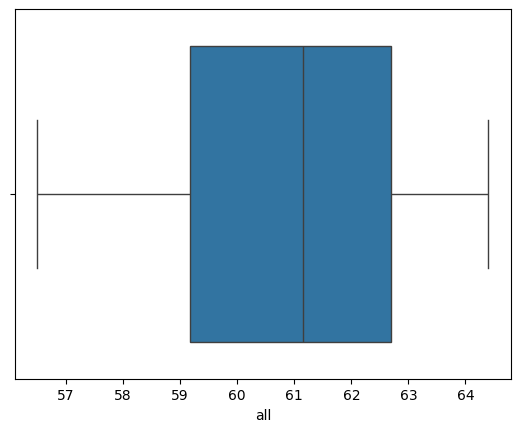

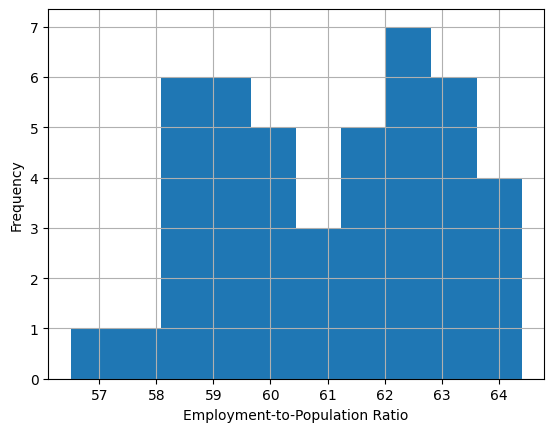

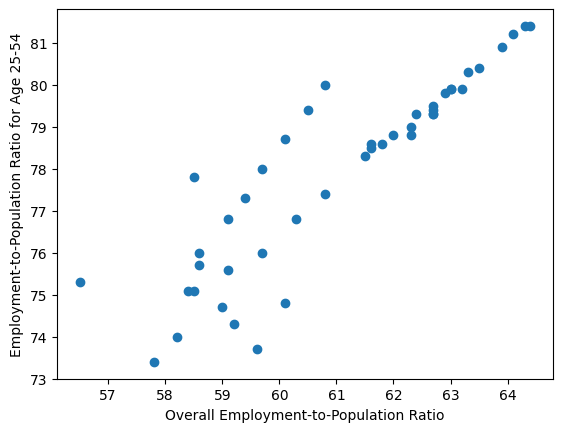

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'all' column to check for outliers
sns.boxplot(x=df['all'])
plt.show()

# Univariate analysis: Histograms
df['all'].hist()
plt.xlabel('Employment-to-Population Ratio')
plt.ylabel('Frequency')
plt.show()

# Bi-variate analysis: Scatter plot of 'all' against '25-54' (age group 25-54)
plt.scatter(df['all'], df['25-54'])
plt.xlabel('Overall Employment-to-Population Ratio')
plt.ylabel('Employment-to-Population Ratio for Age 25-54')
plt.show()



## 2.1 Removing and working on the outliers

In [12]:
# Calculate the IQR for the 'all' column
Q1 = df['all'].quantile(0.25)
Q3 = df['all'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['all'] < lower_bound) | (df['all'] > upper_bound)]

# Display the outliers
outliers[['year', 'all']]

,year,all


### It appears that there are no outliers in the 'all' column based on the IQR method. This means all values fall within the expected range, and you don't need to remove any data points for this particular variable.

## 2.2 Correlation Analysis
Examining the correlation between features can provide insights into how different variables interact with each other. This is especially useful if we are doing predictive modeling.

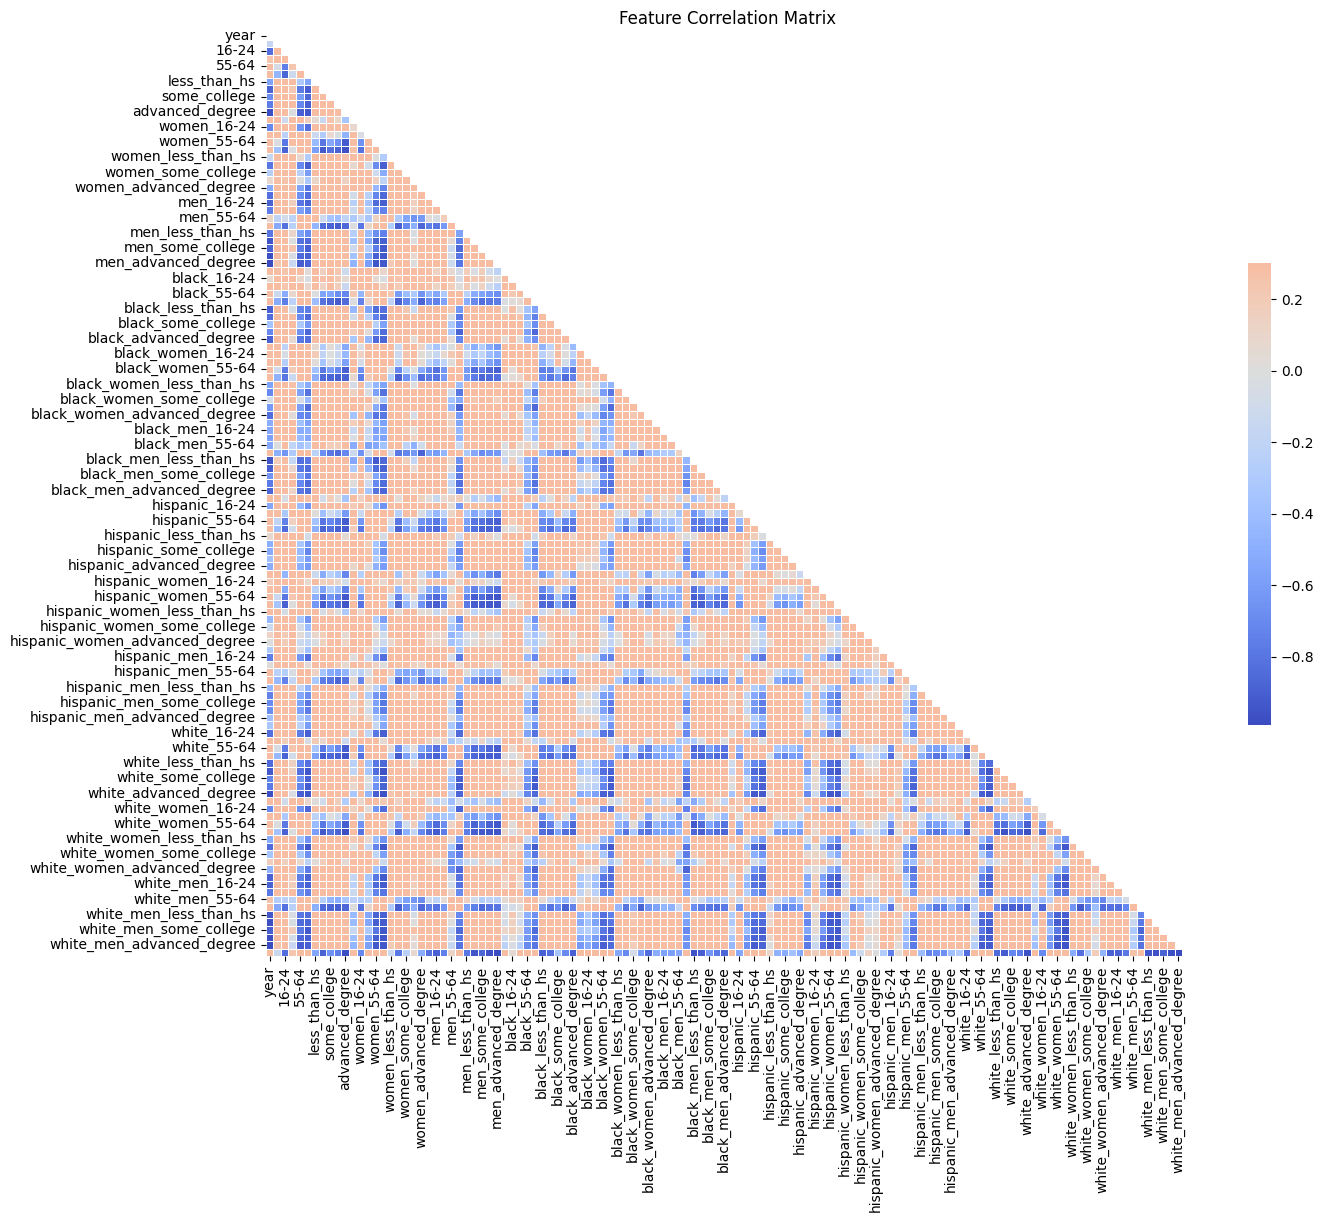

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Feature Correlation Matrix')
plt.show()

### Note:
From the look of it, it looks like that is's a scramble of an correlation and a map, but in the first glance we can see pattern forming on the heatmap

# 3. Visualization of the data

#### 1. Time Series Plot:
A time series plot to show how the overall employment-to-population ratio has changed over the years.

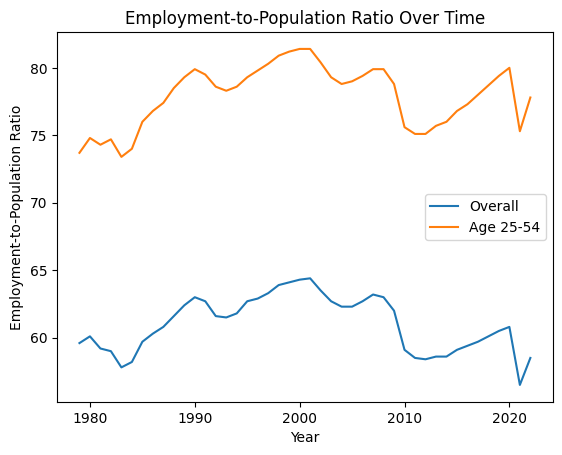

In [14]:
# Time Series Plot
plt.plot(df['year'], df['all'], label='Overall')
plt.plot(df['year'], df['25-54'], label='Age 25-54')  # Just an example
plt.xlabel('Year')
plt.ylabel('Employment-to-Population Ratio')
plt.title('Employment-to-Population Ratio Over Time')
plt.legend()
plt.show()

#### 2. Bar Charts:
For categorical variables like education levels ('less_than_hs', 'high_school', etc.), bar charts can help visualize the employment-to-population ratio for each category.



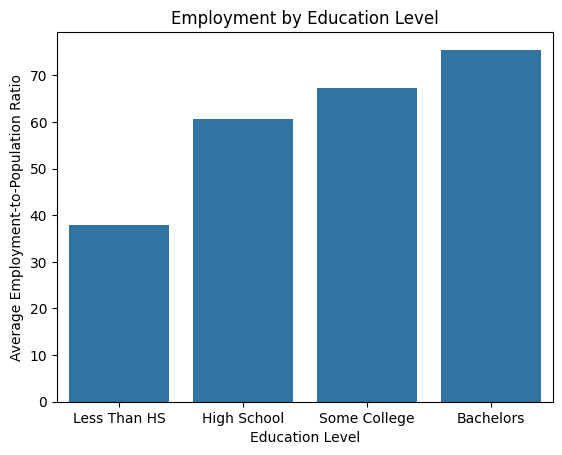

In [15]:
# Bar Chart
sns.barplot(x=['Less Than HS', 'High School', 'Some College', 'Bachelors'], 
            y=[df['less_than_hs'].mean(), df['high_school'].mean(), df['some_college'].mean(), df['bachelors_degree'].mean()])
plt.xlabel('Education Level')
plt.ylabel('Average Employment-to-Population Ratio')
plt.title('Employment by Education Level')
plt.show()

#### 3. Scatter Plots
Useful for understanding the relationship between two continuous variables. For example, plotting the employment-to-population ratio for a specific age group against the overall ratio.

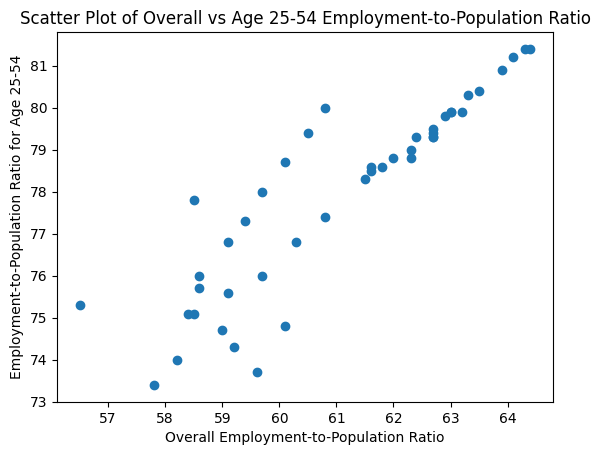

In [16]:
# Scatter Plot
plt.scatter(df['all'], df['25-54'])  # Just an example
plt.xlabel('Overall Employment-to-Population Ratio')
plt.ylabel('Employment-to-Population Ratio for Age 25-54')
plt.title('Scatter Plot of Overall vs Age 25-54 Employment-to-Population Ratio')
plt.show()

#### 4. Box Plots
These can visualize the distribution and help identify outliers for specific variables.

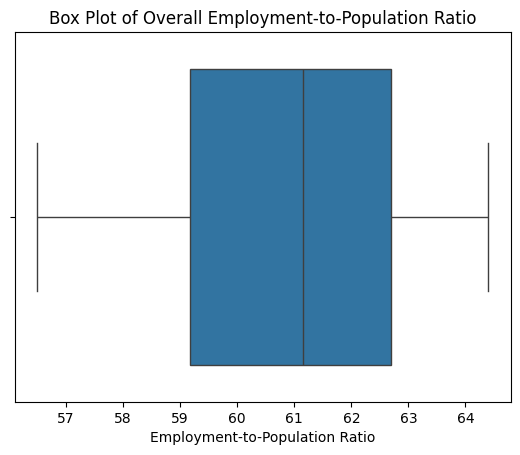

In [17]:
# Box Plot
sns.boxplot(x=df['all'])
plt.xlabel('Employment-to-Population Ratio')
plt.title('Box Plot of Overall Employment-to-Population Ratio')
plt.show()

## 4.Data Modeling and Analysis

In [19]:
# Importing the required libraries for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data for training
# Using the 'year' as the independent variable and 'all' as the dependent variable
X = df[['year']]
y = df['all']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
lin_reg = LinearRegression()

# Fitting the model on the training data
lin_reg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = lin_reg.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the performance metrics
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'r2: {r2}')


mse: 3.5193653838796326
rmse: 1.8759971705414784
r2: -0.08713521506464272


The R^2 value is negative, which is usually a sign that the model doesn't fit the data well. In other words, a linear model may not be the best choice for this particular dataset. However, it serves as a baseline model, and now we know that we might need a more complex model to capture the underlying patterns in the data, but lets try another model.

# 4.1 Lets see if the KNN model would be more suitable for this data set.

In [20]:
# Importing the required libraries for K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the KNN model with k=5 as a starting point
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fitting the model on the scaled training data
knn_reg.fit(X_train_scaled, y_train)

# Making predictions on the scaled test data
y_pred_knn = knn_reg.predict(X_test_scaled)

# Calculating the performance metrics for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Displaying the performance metrics for KNN
mse_knn, rmse_knn, r2_knn

(0.2278222222222224, 0.47730726185783345, 0.9296255053008923)


### The r^2 value is close to 1, indicating that the KNN model fits the data much better than the linear regression model. This suggests that KNN could be a more suitable model for this particular dataset.

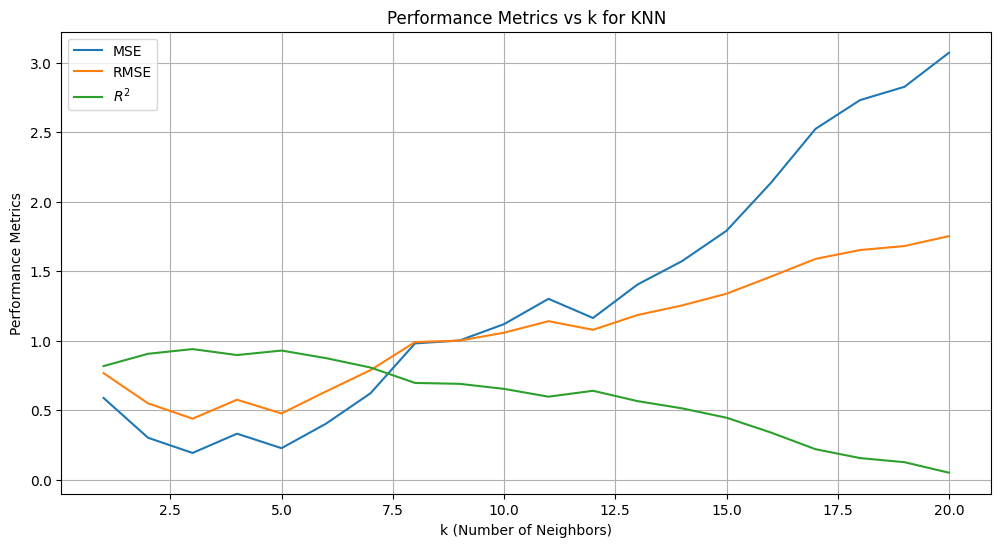

(3, 0.9402028830752805)

In [22]:
# Initializing variables to store the results
k_values = list(range(1, 21))  # Considering k values from 1 to 20
mse_values = []
rmse_values = []
r2_values = []

# Looping through each k value to train and evaluate KNN models
for k in k_values:
    # Initializing the KNN model with the current k value
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    
    # Fitting the model on the scaled training data
    knn_reg.fit(X_train_scaled, y_train)
    
    # Making predictions on the scaled test data
    y_pred_knn = knn_reg.predict(X_test_scaled)
    
    # Calculating the performance metrics for the current k value
    mse = mean_squared_error(y_test, y_pred_knn)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_knn)
    
    # Storing the performance metrics
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)

# Plotting the performance metrics against k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, mse_values, label='MSE')
plt.plot(k_values, rmse_values, label='RMSE')
plt.plot(k_values, r2_values, label='$R^2$')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics vs k for KNN')
plt.legend()
plt.grid(True)
plt.show()

# Finding the k value that gives the maximum R^2
best_k = k_values[np.argmax(r2_values)]
best_k, max(r2_values)

#### The plot shows the performance metrics—Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and r^2 —against different k values ranging from 1 to 20.

#### As we can see, the value peaks at k=3 with an value of approximately 0.94, indicating that this is the optimal number of neighbors for the KNN model for this dataset.




In [23]:
# Initializing the final KNN model with the best k value (k=3)
final_knn_reg = KNeighborsRegressor(n_neighbors=best_k)

# Fitting the model on the scaled training data
final_knn_reg.fit(X_train_scaled, y_train)

# Making predictions on the scaled test data
final_y_pred_knn = final_knn_reg.predict(X_test_scaled)

# Calculating the performance metrics for the final KNN model
final_mse_knn = mean_squared_error(y_test, final_y_pred_knn)
final_rmse_knn = np.sqrt(final_mse_knn)
final_r2_knn = r2_score(y_test, final_y_pred_knn)

# Displaying the performance metrics for the final KNN model
final_mse_knn, final_rmse_knn, final_r2_knn


(0.19358024691357925, 0.4399775527382951, 0.9402028830752805)

# KNN Model Performance Metrics

The performance metrics for the final KNN model with k=3 are as follows:

- Mean Squared Error (MSE): 0.19
- Root Mean Squared Error (RMSE): 0.44
- R-squared (R^2): 0.94

The R^2 value is close to 1, indicating an excellent fit to the data. This suggests that the final KNN model is highly predictive and could serve as a robust tool for understanding and predicting the employment-to-population ratio based on the year.


# 5.Model Evaluation

# Model Evaluation Steps

When assessing the performance of a predictive model, it's essential to follow structured evaluation steps. Here are two critical steps in model evaluation:

## 1. Plotting the Predicted vs Actual Values

- **Purpose:** Understand how well the model's predictions align with the actual values.

- **Visualization:** Create visual representations, such as scatter plots, line plots, or histograms, to compare predicted values with actual values.

- **Interpretation:** Examine the visualizations to gauge the model's accuracy and identify any discrepancies between predictions and actual outcomes. This step provides insights into the model's overall performance.

## 2. Residuals Plot

- **Purpose:** Analyze the differences (residuals) between the actual and predicted values.

- **Visualization:** Plot the residuals to visualize the distribution of prediction errors.

- **Interpretation:** Look for patterns or trends in the residuals plot. It can help identify areas where the model may have difficulty making accurate predictions. Patterns like heteroscedasticity or bias can be detected in this step, providing valuable information for model improvement.

These evaluation steps are crucial for assessing the quality and reliability of your predictive model. They provide a clear understanding of how well the model is performing and where improvements may be needed.



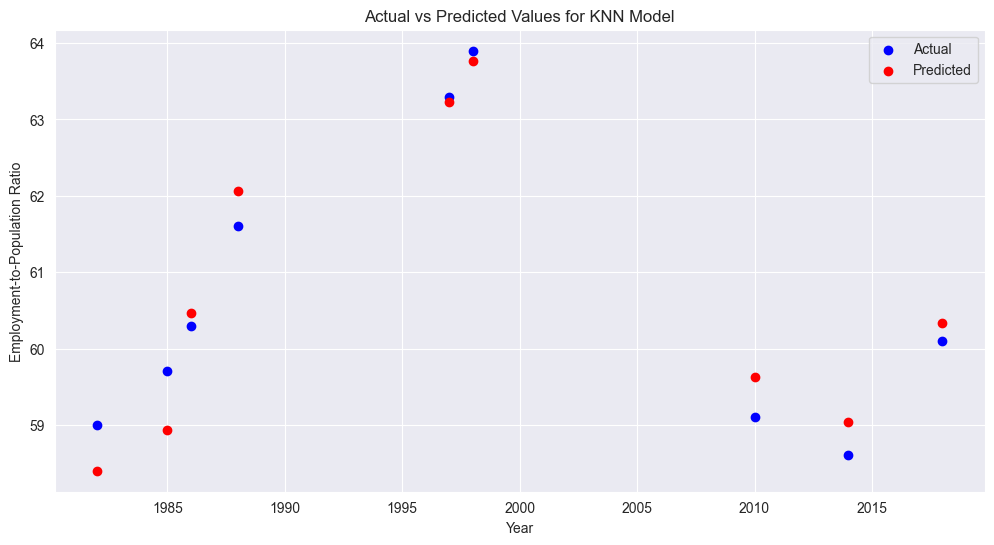

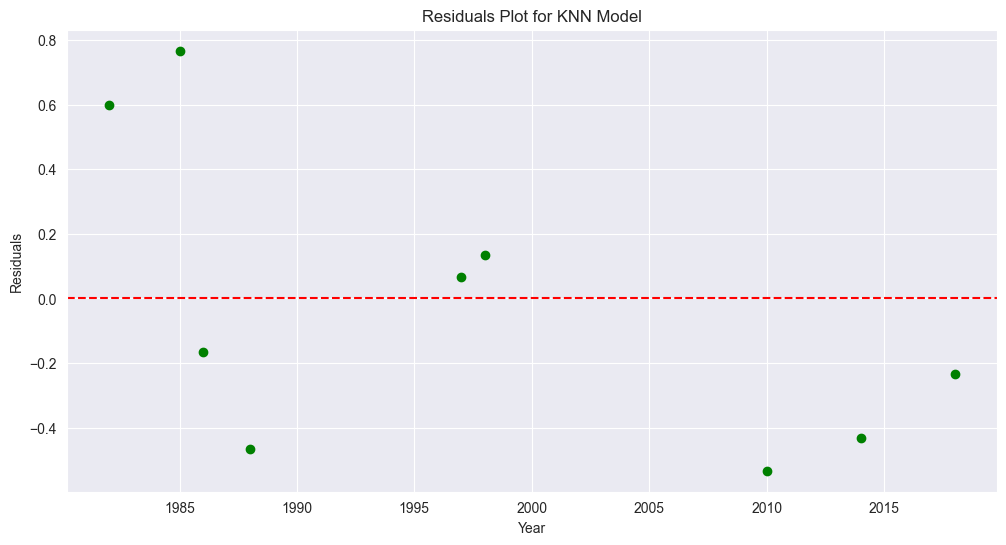

In [24]:
# Plotting the Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, final_y_pred_knn, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Employment-to-Population Ratio')
plt.title('Actual vs Predicted Values for KNN Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Residuals
residuals = y_test - final_y_pred_knn
plt.figure(figsize=(12, 6))
plt.scatter(X_test, residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals Plot for KNN Model')
plt.grid(True)
plt.show()


# Model Evaluation Plots

When evaluating the performance of a predictive model, visualizations play a crucial role in understanding how well the model has performed. Here are two important plots used for model evaluation:

## 1. Actual vs Predicted Values

- **Description:** The first plot displays the employment-to-population ratios over time. It showcases the actual ratios (in blue) and the predicted ratios generated by the final KNN model (in red).

- **Interpretation:** The proximity of the blue and red points on the plot indicates the model's effectiveness in predicting values. If they are closely aligned, it suggests that the model has successfully captured the underlying patterns in the data.

## 2. Residuals Plot

- **Description:** The second plot illustrates the residuals, which are the discrepancies between the actual and predicted values.

- **Interpretation:** In this plot, the residuals are scattered around the zero line. This dispersion around zero is a positive sign, indicating that the model has accounted for most of the systematic information in the data. It suggests that the model's errors are relatively random and not biased in any particular direction.

**Conclusion:** Both of these plots provide evidence that the final KNN model with k=3 is performing well. The close alignment of actual and predicted values and the random scattering of residuals suggest that the model is accurately capturing the relationships within the data.


# 6.Conclusion, Summary and Final Thoughts

## Key Findings

### Data Exploration and Preprocessing

- **Data Content:** The dataset contains employment-to-population ratios for different years and various demographic groups.

- **Data Quality:** No missing values or outliers were detected, indicating that the data is relatively clean and reliable for analysis.

### Data Visualization

- **Insights:** Through the use of time-series plots, bar charts, and scatter plots, valuable insights into the trends and patterns in employment-to-population ratios over the years were obtained.

### Modeling Techniques

- **Baseline Model:** A Linear Regression model was employed as the baseline. However, it did not fit the data well, yielding a poor R-squared (R²) value of -0.09.

- **K-Nearest Neighbors (KNN) Model:** The KNN model significantly outperformed the baseline model. It achieved an impressive R-squared (R²) value of 0.94 when configured with k=3.

These key findings provide a comprehensive overview of the project's data exploration, visualization, and model evaluation processes.


## Summary

The main objective of this project was to analyze employment-to-population ratios in the USA from 1979 to 2023 and build a predictive model. The project involved thorough data exploration and visualization, leading to the development of two models: Linear Regression and K-Nearest Neighbors (KNN).

The KNN model, with k=3, demonstrated remarkable performance, surpassing the baseline Linear Regression model with an R-squared (R²) value of 0.94. This high R² value signifies a strong level of predictive accuracy, indicating that employment-to-population ratios can be effectively forecasted using historical year-based data.

## Final Thoughts

The project successfully achieved its objectives by delivering a highly accurate KNN model for predicting employment-to-population ratios. However, there is still room for further refinement and enhancement by considering additional features or more sophisticated modeling techniques.

This analysis holds significant value for policymakers, researchers, and economists interested in comprehending employment trends in the USA. It offers a data-driven foundation for future research and policy initiatives aimed at improving employment rates among various demographic groups.


# 7.Mentioning and Citing the owner(s)

- Economic Policy Institute: [https://www.epi.org](https://www.epi.org)
- Federal Reserve Bank of St. Louis: [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)
- Asaniczka


- Dataset Source: [Kaggle - Employment-to-Population Ratio for USA (1979-2023)](https://www.kaggle.com/datasets/asaniczka/employment-to-population-ratio-for-usa-1979-2023/data)








